In [2]:
import pandas as pd
import umap # Install as umap-learn
import getpass

In [3]:
def get_group_features(group):
    return(
        pd.read_csv("../../../data/nlpca_results.csv")
        .set_index("country_year_id")
        .query(f"group == '{group}'")
        .drop(columns = ["group"])
    )

features_dct = {g: get_group_features(g) for g in ["AA", "AB", "BA", "BB"]} 

In [ ]:
def umap_reduction(group, features):

    umap_model = umap.UMAP(
        n_neighbors  = 5,  
        min_dist     = 0.1,
        metric       = "euclidean", 
        n_components = 2,
        n_jobs       = 1,
        random_state = 1910
    )

    features_reduced = umap_model.fit_transform(features)

    return(features_reduced)

umap_list = [umap_reduction(group, features) for group, features in features_dct.items()]

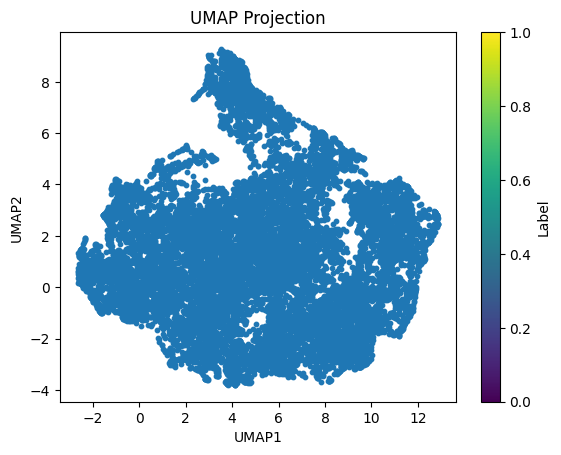

In [5]:
import matplotlib.pyplot as plt

plt.scatter(umap_list[1][:, 0], umap_list[1][:, 1], s=10)
plt.colorbar(label='Label')
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()